In [1]:
pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score  # Import accuracy metric

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
covertype = fetch_ucirepo(id=31) 
  
# data (as pandas dataframes) 
X = covertype.data.features 
y = covertype.data.targets 
  
# metadata 
print(covertype.metadata) 
  
# variable information 
print(covertype.variables) 


{'uci_id': 31, 'name': 'Covertype', 'repository_url': 'https://archive.ics.uci.edu/dataset/31/covertype', 'data_url': 'https://archive.ics.uci.edu/static/public/31/data.csv', 'abstract': 'Classification of pixels into 7 forest cover types based on attributes such as elevation, aspect, slope, hillshade, soil-type, and more.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 581012, 'num_features': 54, 'feature_types': ['Categorical', 'Integer'], 'demographics': [], 'target_col': ['Cover_Type'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Sat Mar 16 2024', 'dataset_doi': '10.24432/C50K5N', 'creators': ['Jock Blackard'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting forest cover type from cartographic variables only (no remotely sensed data).  The actual forest cover type for a given observation (30 x 30 meter cell) was determined from

In [4]:
customers_data=pd.concat([X, y], axis=1)
customers_data.head()


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [5]:
#customers_data=customers_data.drop(columns=['ID'],axis=1) #dropping class 


In [6]:
customers_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Soil_Type1                          581012 non-null 

In [7]:
customers_data.isin(['?']).sum()
customers_data.replace('?',np.NaN,inplace =True)

In [8]:
customers_data.isin([np.NaN]).sum()
customers_data.isnull().sum()
customers_data.dropna(how='any',inplace=True)

In [9]:
customers_data=customers_data.dropna()
customers_data.isnull()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Cover_Type
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
581008,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
581009,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
581010,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
random_seed=42
#data_copy_sample=customers_data.copy() #Using all the data
data_copy_sample = customers_data.sample(frac=0.01, random_state=random_seed)


In [11]:
print(customers_data.duplicated().value_counts()) ##checking for duplicated data
print("----")
customers_data=customers_data.drop_duplicates() # dropping duplicated data
print(customers_data.duplicated().value_counts())

False    581012
Name: count, dtype: int64
----
False    581012
Name: count, dtype: int64


In [12]:
X=data_copy_sample.drop(columns=['Cover_Type'],axis=1) #dropping class 
y=data_copy_sample['Cover_Type']
X.head()


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4
250728,3351,206,27,726,124,3813,192,252,180,2271,...,0,0,0,0,1,0,0,0,0,0
246788,2732,129,7,212,1,1082,231,236,137,912,...,0,0,0,0,0,0,0,0,1,0
407714,2572,24,9,201,25,957,216,222,142,2191,...,0,0,0,0,0,0,0,0,1,0
25713,2824,69,13,417,39,3223,233,214,110,6478,...,0,0,0,0,0,0,0,0,0,0
21820,2529,84,5,120,9,1092,227,231,139,4983,...,0,0,0,0,0,0,0,0,0,0


In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [14]:
#splitting the data into 70-30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)


In [15]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)  # Added DT
}


In [16]:
k_values = range(3, 21)  # K values from 3 to 20
results = []

In [17]:
# Perform cross-validation for each K value
for k in k_values:
    kf = KFold(n_splits=k, shuffle=True, random_state=42)  # Shuffle to reduce order bias

    for model_name, model in models.items():
        

        # Compute variance using cross-validation on training data
        train_accuracies = cross_val_score(model, X_train, y_train, cv=kf)
        train_accuracy_mean = np.mean(train_accuracies)  # Training accuracy
        train_accuracy_variance = np.var(train_accuracies)  # Training accuracy variance

        # Compute cross-validation scores
        model.fit(X_train, y_train)

        # Predict on test data
        y_pred = model.predict(X_test)

        # Compute test accuracy
        test_accuracy = accuracy_score(y_test, y_pred)

        # Compute bias using test set (1 - Accuracy)
        ##bias = 1 - accuracy

        bias = train_accuracy_mean - test_accuracy

        results.append({
            "Model": model_name,
            "K": k,
            "Training Accuracy": train_accuracy_mean,
            "Variance": train_accuracy_variance,
            "Test Accuracy": test_accuracy,
            "Bias": bias
        })

        


In [18]:
# Convert results into a DataFrame
import pandas as pd
df_results = pd.DataFrame(results)

# Save results to a CSV file
df_results.to_csv("bias_variance_results.csv", index=False)

# Display results without ace_tools
print(df_results.head())  # Print first 5 rows for verification

                    Model  K  Training Accuracy  Variance  Test Accuracy  \
0     Logistic Regression  3           0.715021  0.000034       0.721170   
1     K-Nearest Neighbors  3           0.689695  0.000085       0.714859   
2  Support Vector Machine  3           0.719447  0.000029       0.736087   
3           Decision Tree  3           0.664370  0.000022       0.701664   
4     Logistic Regression  4           0.715513  0.000036       0.721170   

       Bias  
0 -0.006149  
1 -0.025165  
2 -0.016640  
3 -0.037293  
4 -0.005657  


In [19]:
df_check = pd.read_csv("bias_variance_results.csv")
print(df_check.head())  # Print first few rows

                    Model  K  Training Accuracy  Variance  Test Accuracy  \
0     Logistic Regression  3           0.715021  0.000034       0.721170   
1     K-Nearest Neighbors  3           0.689695  0.000085       0.714859   
2  Support Vector Machine  3           0.719447  0.000029       0.736087   
3           Decision Tree  3           0.664370  0.000022       0.701664   
4     Logistic Regression  4           0.715513  0.000036       0.721170   

       Bias  
0 -0.006149  
1 -0.025165  
2 -0.016640  
3 -0.037293  
4 -0.005657  


In [20]:
# Function to plot Bias vs K and Variance vs K for each model
def plot_results(df, metric, ylabel, title_suffix):
    for model_name in df["Model"].unique():
        plt.figure(figsize=(8, 5))

        # Filter data for a specific model
        model_data = df[df["Model"] == model_name]
        x = model_data["K"].values
        y = model_data[metric].values

        # Scatter plot (Black markers)
        plt.scatter(x, y, color="black", label=f"{model_name} {ylabel}")

        # Fit and plot a straight trend line (Linear regression of degree 1)
        z = np.polyfit(x, y, 1)  # Linear trend line
        p = np.poly1d(z)
        plt.plot(x, p(x), color="black")  # Solid black trend line
        
        # Labels and title
        plt.xlabel("K Value")
        plt.ylabel(ylabel)
        plt.title(f"{ylabel} vs K Value ({model_name})")
        plt.legend()
        plt.grid(color='gray', linestyle='solid', linewidth=0.5)
        plt.show()

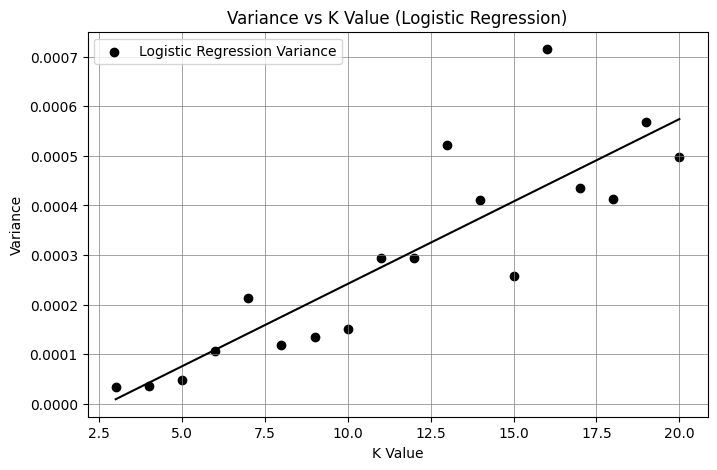

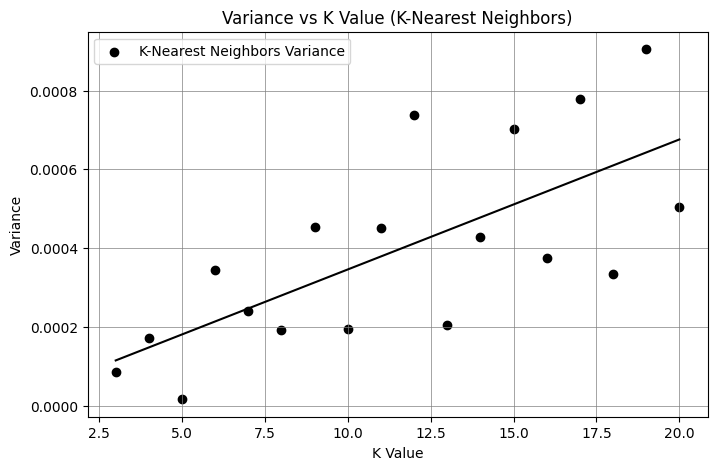

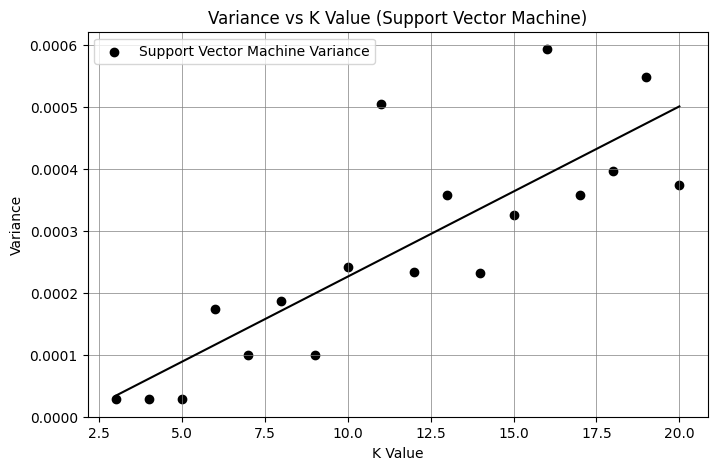

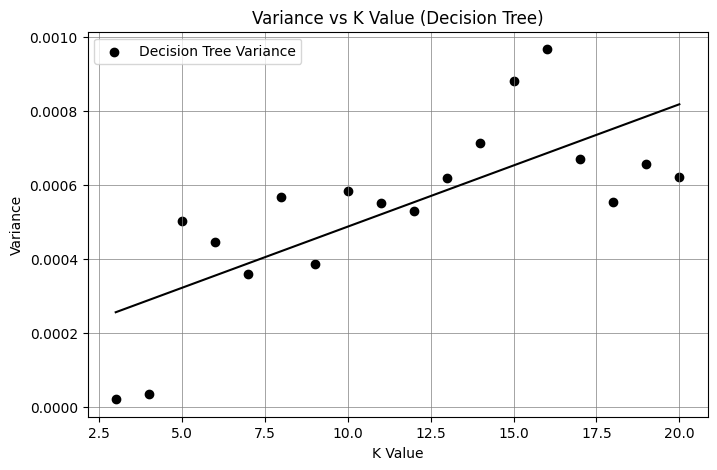

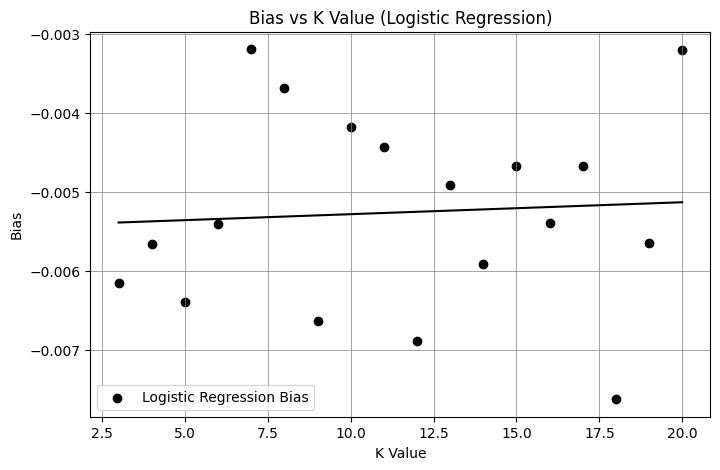

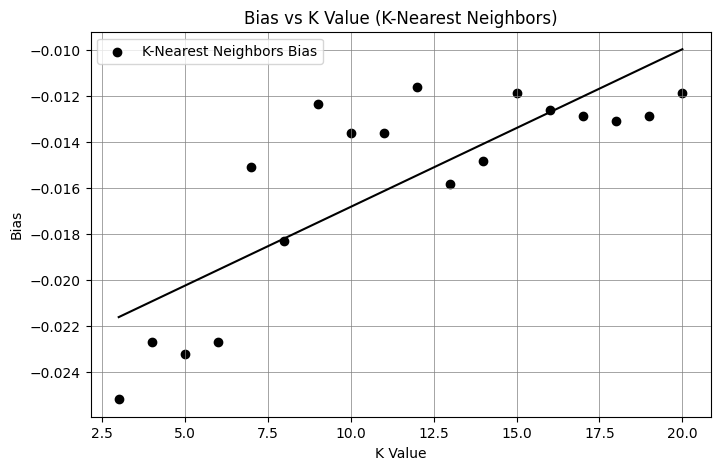

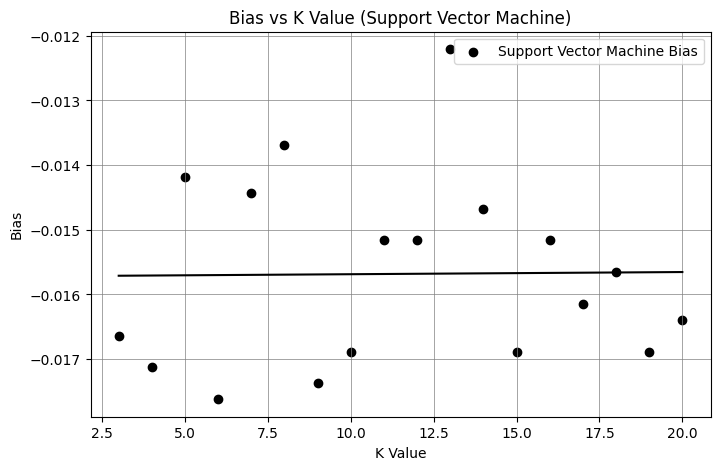

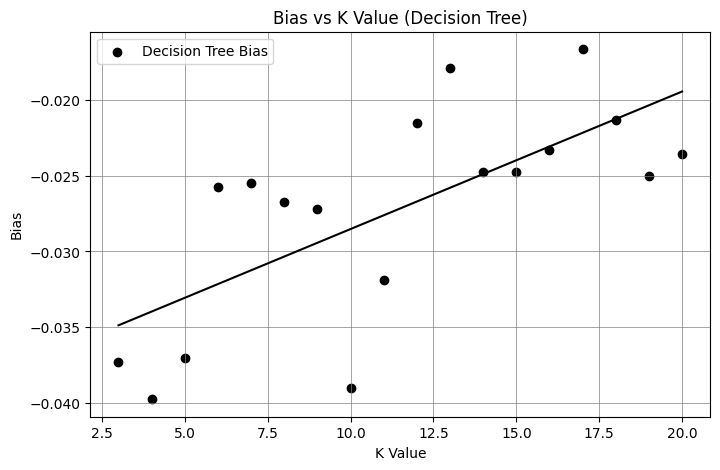

In [21]:
# Generate plots only for Bias and Variance
plot_results(df_results, "Variance", "Variance", "Effect of K on Variance")
plot_results(df_results, "Bias", "Bias", "Effect of K on Bias (Train Accuracy - Test Accuracy)")

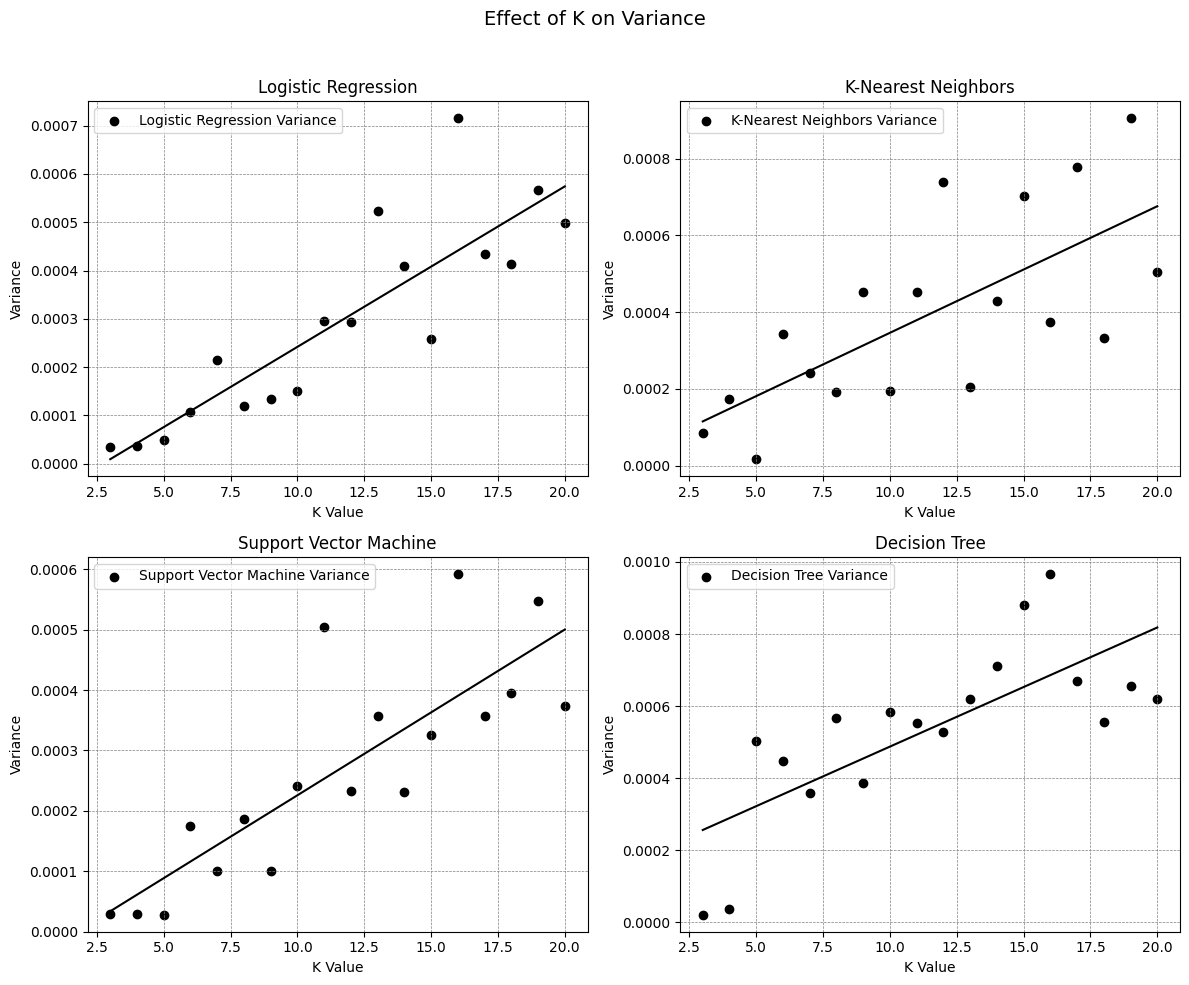

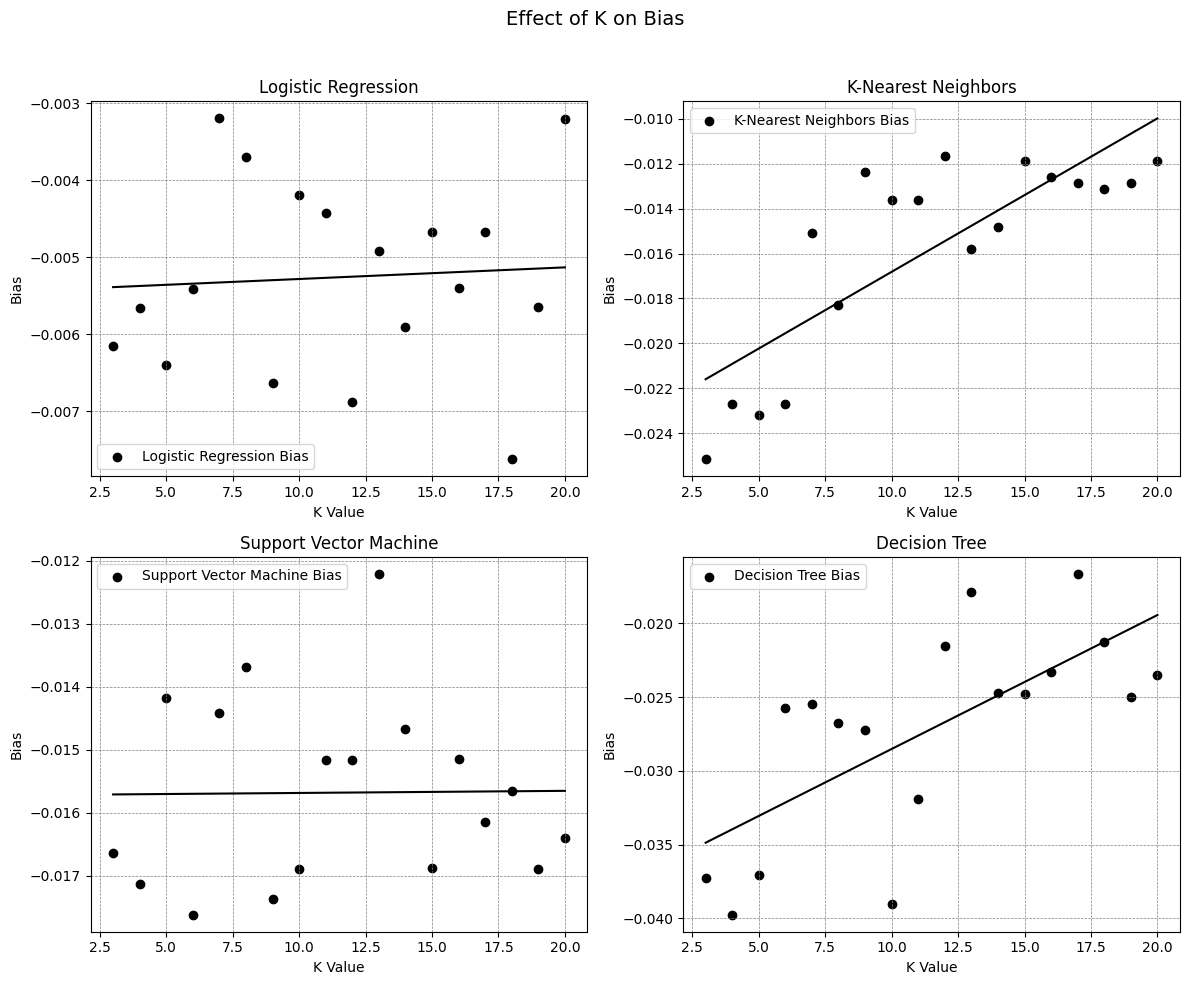

In [22]:
# Function to plot grouped Bias and Variance graphs (4 per image)
def plot_grouped_results(df, metric, ylabel, title_suffix, filename):
    models_list = df["Model"].unique()  # Get unique model names
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Create 2x2 subplot grid

    for i, model_name in enumerate(models_list[:4]):  # Limit to 4 models
        ax = axes[i // 2, i % 2]  # Position in 2x2 grid

        # Filter data for a specific model
        model_data = df[df["Model"] == model_name]
        x = model_data["K"].values
        y = model_data[metric].values

        # Scatter plot (Black markers)
        ax.scatter(x, y, color="black", label=f"{model_name} {ylabel}")

        # Fit and plot a straight trend line (Linear regression of degree 1)
        z = np.polyfit(x, y, 1)  # Linear trend line
        p = np.poly1d(z)
        ax.plot(x, p(x), color="black")  # Solid black trend line

        # Labels and title
        ax.set_xlabel("K Value")
        ax.set_ylabel(ylabel)
        ax.set_title(f"{model_name}")

        ax.legend()
        ax.grid(color='gray', linestyle='--', linewidth=0.5)

    # Adjust layout and show plot
    plt.suptitle(title_suffix, fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig(filename, dpi=300, bbox_inches='tight')  # Save image
    plt.show()

# Generate grouped plots for Bias and Variance (Each containing 4 graphs)
plot_grouped_results(df_results, "Variance", "Variance", "Effect of K on Variance", "variance_graph.png")
plot_grouped_results(df_results, "Bias", "Bias", "Effect of K on Bias", "bias_graphs.png")
